## Ch03_Q13 in page 133 :Regression
In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

## Part (a)
Using the `normal()` method of your random number generator, create a vector, `x`, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.

In [1]:
import numpy as np

np.random.seed(1)

# Generate x
x = np.random.normal(0, 1, 100)
x[:10]  # Display first 10 elements to verify


array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038])

## Part (b)
Using the `normal()` method, create a vector, `eps`, containing 100 observations drawn from a N(0,0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [2]:
# Generate eps
eps = np.random.normal(0, 0.5, 100)
eps[:10]  # Display first 10 elements to verify

array([-0.22356428,  0.61225385,  0.20174582,  0.29678926, -0.54745592,
        0.08469122,  0.37027823, -0.4768503 , -0.13310925,  0.01630727])

## Part (c)
Using `x` and `eps`, generate a vector `y` according to the model
Y =−1+0.5X+ε. (3.39)
What is the length of the vector `y`? What are the values of β_0 and β_1 in this linear model?

In [3]:
# Generate y
y = -1 + 0.5 * x + eps
print(f'Length of vector: {len(y)}\nValue of β_0: -1\nValue of β_1: 0.5')

Length of vector: 100
Value of β_0: -1
Value of β_1: 0.5


## Part (d)
Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

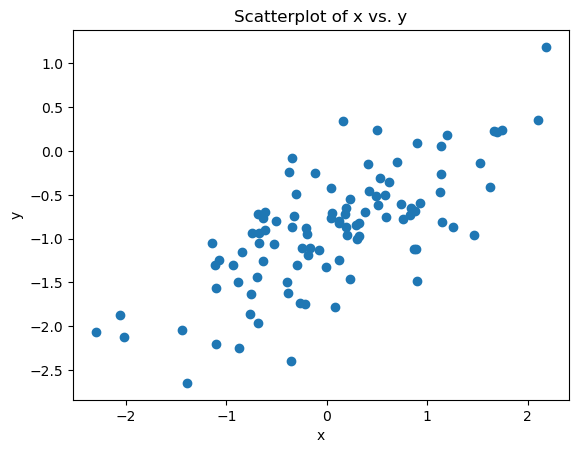

In [4]:
import matplotlib.pyplot as plt

# Scatterplot of x and y
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x vs. y')
plt.show()

### Comments:
- The scatterplot shows a clear linear relationship between `x` and `y`, which is expected given that the data was generated using the model \( Y = -1 + 0.5X + ε \).
- There is some random variation (scatter) around the linear trend due to the error term \(ε) in the model, but the overall positive slope of approximately 0.5 is evident. This confirms that for each increase in `x`, `y` increases by about 0.5 units on average, consistent with the value of \( β_1 = 0.5 \) in the model.

## Part (e)
Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do /hat{β_0} and /hat{β_1} compare to β_0 and β_1?

In [5]:
import statsmodels.api as sm

# Add constant term to x for intercept
X = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, X).fit()

# Display summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           2.20e-17
Time:                        13:40:17   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.0

### Comments:  
The estimated coefficients are:

- **\hat{\beta}_0 =−0.9265**, which is close to the true value of \beta_0 = -1.
- **\hat{\beta}_1  = 0.5477**, which is close to the true value of \beta_1 = 0.5.

Both coefficients are statistically significant with very small p-values, and the model explains about 52% of the variance in `y` (R-squared = 0.522). The fit is reasonably good, with only slight deviations due to random noise.

## Part (f)
Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.

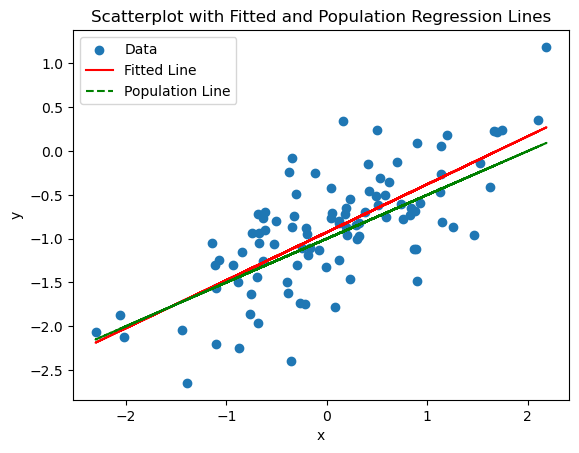

In [6]:
# Predict y values from the model
y_pred = model.predict(X)

# Population regression line: Y = -1 + 0.5X (true relationship)
y_population = -1 + 0.5 * x

# Plot the scatter plot, fitted regression line, and population regression line
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Fitted Line')
plt.plot(x, y_population, color='green', linestyle='--', label='Population Line')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot with Fitted and Population Regression Lines')
plt.legend()

# Display the plot
plt.show()

## Part (g)
Now fit a polynomial regression model that predicts `y` using `x` and `x^2`. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [7]:
# Create polynomial features
x_squared = x ** 2
X_poly = np.column_stack((x, x_squared))
X_poly = sm.add_constant(X_poly)

# Fit the model
poly_model = sm.OLS(y, X_poly).fit()

# Display summary
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           2.83e-16
Time:                        13:40:17   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.0

### Comments:  
There is **no evidence** that the quadratic term improves the model fit:

- The **coefficient for \(x^2\)** is **0.0077** with a **p-value of 0.856**, which is not statistically significant. This indicates that the quadratic term does not contribute meaningfully to explaining the variability in `y`.
- The **R-squared** remains the same at **0.522**, meaning the quadratic term does not improve the explanatory power of the model.

Thus, adding the quadratic term does not improve the model fit.

## Part (h)
Repeat (a)–(f) after modifying the data generation process in such a way that there is *less* noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1872.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.14e-65
Time:                        13:40:17   Log-Likelihood:                 87.938
No. Observations:                 100   AIC:                            -171.9
Df Residuals:                      98   BIC:                            -166.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9988      0.010    -98.222      0.0

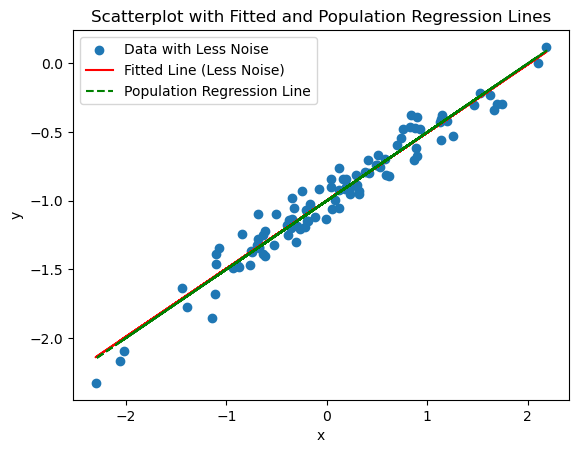

In [8]:
# Generate new eps with less noise (smaller standard deviation)
eps_less_noise = np.random.normal(0, 0.1, 100)

# Generate y with less noise
y_less_noise = -1 + 0.5 * x + eps_less_noise

# Fit the least squares model
X = sm.add_constant(x)
model_less_noise = sm.OLS(y_less_noise, X).fit()

# Print the regression summary
print(model_less_noise.summary())

# Population regression line: Y = -1 + 0.5X (true relationship)
y_population = -1 + 0.5 * x

# Plot the scatter plot and regression lines for "less noise"
plt.scatter(x, y_less_noise, label='Data with Less Noise')
plt.plot(x, model_less_noise.predict(X), color='red', label='Fitted Line (Less Noise)')
plt.plot(x, y_population, color='green', label='Population Regression Line', linestyle='--')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot with Fitted and Population Regression Lines')
plt.legend()

# Display the plot
plt.show()

### Comments:  
With less noise, the model fit improves significantly:

- **R-squared = 0.950**, indicating a much better fit.
- The coefficients are very close to the true values: \( \hat{\beta}_0 = -0.9988 \), \( \hat{\beta}_1 = 0.4959 \).
- Both coefficients are highly significant (p-value = 0.000).
- The model is much more precise, explaining 95.0% of the variance in `y`.

## Part (i)
Repeat (a)–(f) after modifying the data generation process in such a way that there is *more* noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     10.62
Date:                Tue, 15 Oct 2024   Prob (F-statistic):            0.00154
Time:                        13:40:17   Log-Likelihood:                -147.75
No. Observations:                 100   AIC:                             299.5
Df Residuals:                      98   BIC:                             304.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0140      0.107     -9.445      0.0

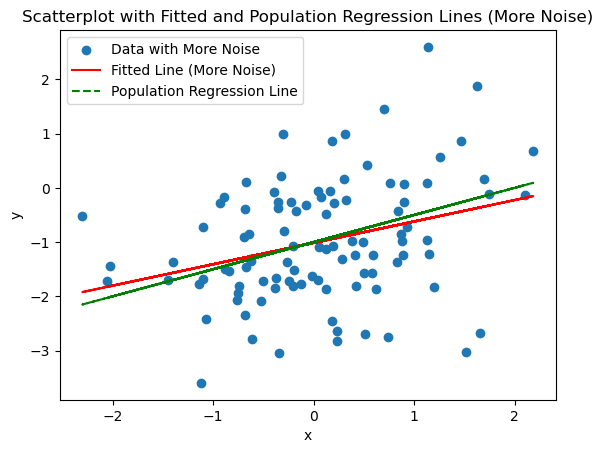

In [9]:
# Generate new eps with more noise (larger standard deviation)
eps_more_noise = np.random.normal(0, 1, 100)

# Generate y with more noise
y_more_noise = -1 + 0.5 * x + eps_more_noise

# Fit the least squares model
model_more_noise = sm.OLS(y_more_noise, X).fit()

# Print the regression summary
print(model_more_noise.summary())

# Population regression line: Y = -1 + 0.5X (true relationship)
y_population = -1 + 0.5 * x

# Plot the scatter plot and regression lines for "more noise"
plt.scatter(x, y_more_noise, label='Data with More Noise')
plt.plot(x, model_more_noise.predict(X), color='red', label='Fitted Line (More Noise)')
plt.plot(x, y_population, color='green', label='Population Regression Line', linestyle='--')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot with Fitted and Population Regression Lines (More Noise)')
plt.legend()

# Display the plot
plt.show()

### Comments:  
With more noise:

- **R-squared** drops to 0.098, showing a much worse fit.
- Coefficients: \( \hat{\beta}_0 = -1.0140 \), \( \hat{\beta}_1 = 0.3943 \), with larger standard errors.
- The model explains only 9.80% of the variance, and the estimates are less precise.

## Part (j)
What are the confidence intervals for β_0 and β_1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [10]:
# Confidence intervals for the original data set
ci_original = model.conf_int()

# Confidence intervals for the less noisy data set
ci_less_noise = model_less_noise.conf_int()

# Confidence intervals for the more noisy data set
ci_more_noise = model_more_noise.conf_int()

# Displaying the organized confidence intervals for all three models

# Printing the confidence intervals
print("Original Data Set:")
print(f"β0: {ci_original[0]}")
print(f"β1: {ci_original[1]}")

print("\nLess Noisy Data Set:")
print(f"β0: {ci_less_noise[0]}")
print(f"β1: {ci_less_noise[1]}")

print("\nMore Noisy Data Set:")
print(f"β0: {ci_more_noise[0]}")
print(f"β1: {ci_more_noise[1]}")


Original Data Set:
β0: [-1.01974096 -0.83324551]
β1: [0.44261338 0.65281376]

Less Noisy Data Set:
β0: [-1.01894809 -0.97859004]
β1: [0.4731502  0.51863806]

More Noisy Data Set:
β0: [-1.22700729 -0.80091614]
β1: [0.15422192 0.63447234]


### Comments:
- **Less Noise**: The confidence intervals are narrower, meaning that the estimates for \( \beta_0 \) and \( \beta_1 \) are more precise when there is less noise.
- **More Noise**: The confidence intervals are wider, reflecting greater uncertainty in the estimates due to increased variability in the data.
- **Original Data**: The confidence intervals are in between the two extremes, showing a moderate level of precision.

Overall, adding noise increases the uncertainty of the coefficient estimates, while reducing noise leads to more accurate and narrower confidence intervals.